In [1]:
%pip install pingouin

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Importando Bibliotecas

In [2]:
import numpy as np
import pingouin as pg
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import kstest
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import bartlett
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


### Dados para os Testes de Normalidade

Testar se seus dados seguem uma distribuição normal

Então iremos avaliar o p_valor:

- p_valor > 0.05 → dados parecem normais

- p_valor ≤ 0.05 → dados provavelmente NÃO são normais

In [3]:
dados = np.random.normal(loc=0, scale=1, size=1000)
dados

array([ 1.51679116e+00, -1.72915102e+00, -4.10067427e-01, -1.00447497e+00,
       -4.46420948e-01,  1.85103526e-01,  5.83004337e-01, -1.67756433e-01,
       -1.10855788e+00, -1.14127212e-01,  1.57726001e+00,  4.10014587e-01,
        5.06313348e-01,  1.44571059e-01, -1.82722204e-01,  1.60300749e+00,
       -5.29555903e-01, -1.68090042e+00, -1.92535782e-01, -1.29845771e+00,
        5.05604973e-01,  1.50496431e-01,  1.46996943e+00, -1.43791469e+00,
       -1.20892669e+00,  8.46310983e-01, -9.07872843e-01,  2.42869149e-01,
       -8.01947117e-01,  8.44315108e-01, -2.04551873e+00, -3.63524609e-01,
       -5.30719708e-01,  1.96400619e+00, -2.37189780e+00, -1.20051951e-01,
       -7.20232732e-02,  2.96704062e-01,  3.89286353e-01, -8.55251831e-01,
        1.05821762e-01,  1.31492520e+00, -2.34161110e-01,  6.72287421e-01,
        8.91877175e-01,  2.26565495e-01, -1.08793392e+00, -2.49422792e-01,
       -3.36123915e-01, -8.12611892e-01, -5.31540239e-02, -1.59999185e+00,
       -6.96403697e-01, -

### Teste Kolmogorov-Smirnov

In [4]:
estatistica, p_valor = kstest(dados, 'norm')
print(f"estatística = {estatistica:.4f}, \np-valor = {p_valor:.4f}")

estatística = 0.0358, 
p-valor = 0.1514


In [5]:
if p_valor < 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

A amostra é normalmente distribuída (não rejeita H0)


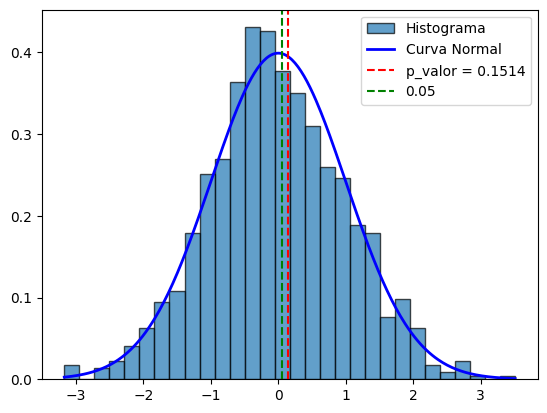

In [6]:
x = np.linspace(min(dados), max(dados), 300)
y = norm.pdf(x, loc=0, scale=1)
plt.hist(dados, bins=30, density=True, edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='blue', linewidth=2, label='Curva Normal')

# Marcar o p_valor
plt.axvline(p_valor, color='red', linestyle='--', label=f'p_valor = {p_valor:.4f}')

# Marcar o valor 0.05
plt.axvline(0.05, color='green', linestyle='--', label='0.05')

plt.legend()
plt.show()

### Teste Shapiro-Wilk

In [7]:
estatistica, p_valor = shapiro(dados)
print(f"estatística = {estatistica:.4f}, \np-valor = {p_valor:.4f}")

estatística = 0.9984, 
p-valor = 0.4881


In [8]:
if p_valor <= 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

A amostra é normalmente distribuída (não rejeita H0)


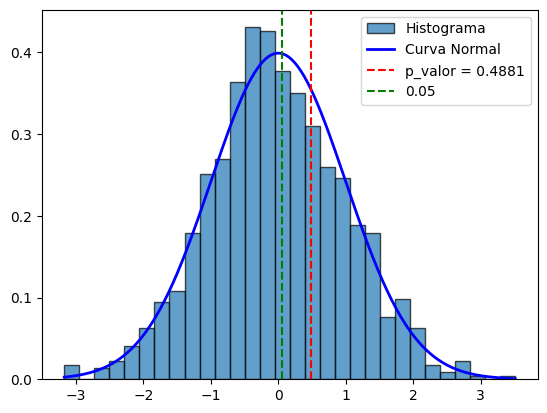

In [9]:
x = np.linspace(min(dados), max(dados), 300)
y = norm.pdf(x, loc=0, scale=1)
plt.hist(dados, bins=30, density=True, edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='blue', linewidth=2, label='Curva Normal')

# Marcar o p_valor
plt.axvline(p_valor, color='red', linestyle='--', label=f'p_valor = {p_valor:.4f}')

# Marcar o valor 0.05
plt.axvline(0.05, color='green', linestyle='--', label='0.05')

plt.legend()
plt.show()

### Teste Shapiro-Francia

In [10]:
def shapiro_francia_test(x):
    x = np.asarray(x)
    x_sorted = np.sort(x)
    n = len(x)

    # Quantis esperados da normal padrão
    quantis = stats.norm.ppf([(i - 0.375) / (n + 0.25) for i in range(1, n + 1)])

    # Correlação de Pearson entre dados ordenados e quantis
    r = np.corrcoef(x_sorted, quantis)[0, 1]
    
    # Estatística do teste (r²)
    W_prime = r**2

    # Aproximação do p-valor via normal padrão
    # A precisão é limitada: Shapiro-Francia não tem p-valor exato fechado
    # Vamos usar uma aproximação baseada em simulações
    # Se o valor de W_prime for muito menor que 1, a normalidade é rejeitada

    # Para simplificação: convertemos a estatística para z usando simulação empírica
    # Aqui usamos uma aproximação baseada na distribuição do W' de dados normais
    # Pode não ser exato, mas funciona bem para propósitos práticos

    z = (W_prime - 1) * np.sqrt(n / 0.05)
    p_value = stats.norm.cdf(z)  # p pequeno => rejeita H0 (normalidade)

    return W_prime, p_value

In [11]:
stat, p = shapiro_francia_test(dados)
print(f"Shapiro-Francia: W' = {stat:.4f}, p-valor = {p:.4f}")

Shapiro-Francia: W' = 0.9984, p-valor = 0.4108


In [12]:
if p <= 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

A amostra é normalmente distribuída (não rejeita H0)


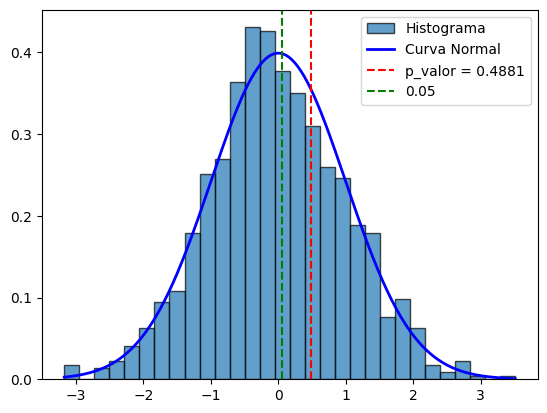

In [13]:
x = np.linspace(min(dados), max(dados), 300)
y = norm.pdf(x, loc=0, scale=1)
plt.hist(dados, bins=30, density=True, edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='blue', linewidth=2, label='Curva Normal')

# Marcar o p_valor
plt.axvline(p_valor, color='red', linestyle='--', label=f'p_valor = {p_valor:.4f}')

# Marcar o valor 0.05
plt.axvline(0.05, color='green', linestyle='--', label='0.05')

plt.legend()
plt.show()

### Dados para Teste de Média Populacional

Comparar se a média de dois grupos é diferente

Então iremos avaliar o p_valor:

- p > 0.05 → as médias são provavelmente iguais

- p ≤ 0.05 → as médias são provavelmente diferentes

In [14]:
grupo1 = np.random.normal(0, 1, 20)
grupo2 = np.random.normal(0.5, 1, 20)

In [15]:
grupo1

array([-0.61865254, -0.11284861,  0.68713662,  2.50179808,  1.01534959,
        2.29150292,  0.76560324, -0.17059338, -0.28570372,  1.46298761,
       -0.40815034, -1.75811041,  0.26355522, -0.51608948, -0.55469362,
       -0.42854666,  0.23274763,  1.3032792 ,  2.36157992,  0.7062028 ])

In [16]:
grupo2

array([-0.82055955,  0.06640928, -0.04589827,  2.7164833 ,  1.99598589,
        0.17342972,  0.09335399,  1.61184339,  0.104594  ,  1.94470982,
        1.52251334,  0.83838871, -0.37732533, -0.43522422,  1.09885145,
        0.79924827, -0.2366868 ,  1.41401047, -0.36227718,  0.49986118])

### Teste TStudent

In [17]:
stat, p = ttest_ind(grupo1, grupo2, equal_var=True)
print(f"t-Student: estatística = {stat:.4f}, p-valor = {p:.4f}")

t-Student: estatística = -0.5775, p-valor = 0.5670


In [18]:
if p <= 0.05:
    print("As médias são diferentes (rejeita H0)")
else:
    print("As médias são iguais (não rejeita H0)")

As médias são iguais (não rejeita H0)


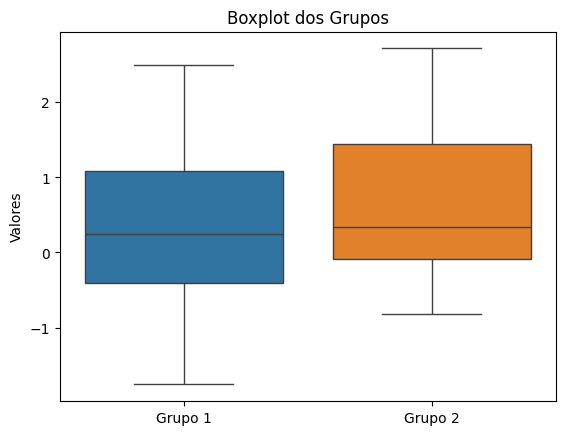

In [22]:
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot dos Grupos')
plt.ylabel('Valores')
plt.show()

### Testes de Homogeneidade de variâncias

Então iremos avaliar o p_valor:

- p > 0.05 → as variâncias são provavelmente iguais

- p ≤ 0.05 → as variâncias são provavelmente diferentes

### Teste Bartlett

In [19]:
stat, p = bartlett(grupo1, grupo2)
print(f"Bartlett: estatística = {stat:.4f}, p-valor = {p:.4f}")

Bartlett: estatística = 0.3945, p-valor = 0.5299


In [24]:
print("Variancia grupo1:", np.var(grupo1, ddof=1))
print("Variancia grupo2:", np.var(grupo2, ddof=1))

Variancia grupo1: 1.2811042563176351
Variancia grupo2: 0.9562183726200258


In [ ]:
if p < 0.05:
    print("Uma ou mais variâncias são diferentes (rejeita H0)")
else:
    print("Todas as variâncias são significamente iguais (não rejeita H0)")

Todas as variâncias são iguais (não rejeita H0)


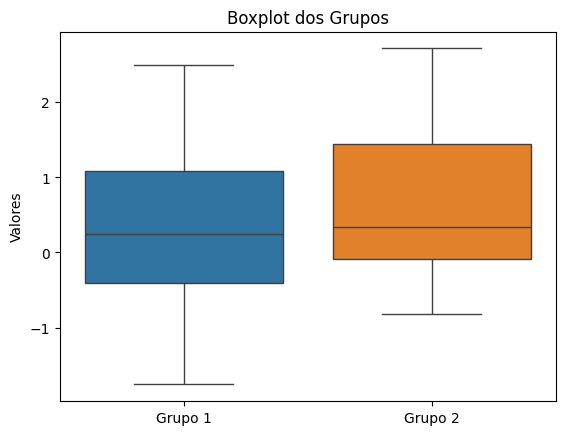

In [23]:
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot dos Grupos')
plt.ylabel('Valores')
plt.show()